In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv(r"C:\Users\James\Downloads\google-project-sunroof\sunroof_solar_potential_by_censustract.csv")
pd.set_option('display.max_columns', 500)

In [10]:
df.head()

,carbon_offset_metric_tons,count_qualified,existing_installs_count,install_size_kw_buckets,kw_median,kw_total,lat_avg,lat_max,lat_min,lng_avg,lng_max,lng_min,number_of_panels_e,number_of_panels_f,number_of_panels_median,number_of_panels_n,number_of_panels_s,number_of_panels_total,number_of_panels_w,percent_covered,percent_qualified,region_name,state_name,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_median,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w
0,2159.887389,586,12,[[0171][5231][10114][1545][2016][252][352][451...,7.25,5219.00,34.267040,34.272362,34.261761,-118.432716,-118.425262,-118.440880,2964,6574,29.0,3159,4352,20876.0,3827,98.121387,86.303387,6037104401,California,1.014756e+06,2.539152e+06,1285.247909,10863.017950,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06
1,11392.316227,369,4,[[060][550][1024][1518][2023][2515][3012][3515...,28.00,28391.25,43.156368,43.162289,43.150970,-77.607040,-77.595558,-77.620216,2760,102635,112.0,693,4578,113565.0,2899,98.623853,85.813953,36055009400,New York,7.338827e+05,2.815855e+07,947.750000,30689.598633,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05
2,6902.286133,788,3,[[0364][5313][1057][1513][207][258][305][351][...,5.25,7352.25,42.277794,42.288818,42.266918,-89.066589,-89.056992,-89.085197,3841,9963,21.0,535,10649,29409.0,4421,99.359431,56.446991,17201000700,Illinois,1.024630e+06,2.850205e+06,980.050000,5823.500452,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06
3,3238.933474,432,1,[[0320][567][1020][1512][251][302][351][401][4...,3.25,3598.25,40.422962,40.428940,40.418259,-79.993729,-79.987312,-80.003838,4920,5001,13.0,299,2529,14393.0,1644,98.687664,38.297872,42003180300,Pennsylvania,1.203715e+06,1.432569e+06,948.600000,3724.817041,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05
4,6111.873688,827,32,[[0125][5219][10227][15124][2039][2520][3015][...,11.50,15098.50,33.844044,33.847179,33.839771,-117.933113,-117.922440,-117.941673,5933,31555,46.0,5146,8933,60394.0,8827,100.000000,90.382514,6059086602,California,2.070519e+06,1.183461e+07,1260.550000,16996.447681,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06


In [33]:
#create feature to get average carbon offset for a qualified building
df['unit_offset'] = df['carbon_offset_metric_tons']/df['count_qualified']

cols_to_drop = ['install_size_kw_buckets', 'region_name',
                'lng_max','lng_min', 'lat_min', 'lat_max',
                'yearly_sunlight_kwh_kw_threshold_avg', 
                'existing_installs_count', 'percent_covered',
                'percent_qualified', 'carbon_offset_metric_tons',
                'count_qualified']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,kw_median,kw_total,lat_avg,lng_avg,number_of_panels_e,number_of_panels_f,number_of_panels_median,number_of_panels_n,number_of_panels_s,number_of_panels_total,number_of_panels_w,state_name,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w,unit_offset
0,7.25,5219.00,34.267040,-118.432716,2964,6574,29.0,3159,4352,20876.0,3827,California,1.014756e+06,2.539152e+06,10863.017950,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06,3.685815
1,28.00,28391.25,43.156368,-77.607040,2760,102635,112.0,693,4578,113565.0,2899,New York,7.338827e+05,2.815855e+07,30689.598633,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05,30.873486
2,5.25,7352.25,42.277794,-89.066589,3841,9963,21.0,535,10649,29409.0,4421,Illinois,1.024630e+06,2.850205e+06,5823.500452,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06,8.759246
3,3.25,3598.25,40.422962,-79.993729,4920,5001,13.0,299,2529,14393.0,1644,Pennsylvania,1.203715e+06,1.432569e+06,3724.817041,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05,7.497531
4,11.50,15098.50,33.844044,-117.933113,5933,31555,46.0,5146,8933,60394.0,8827,California,2.070519e+06,1.183461e+07,16996.447681,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06,7.390416


(0, 175)

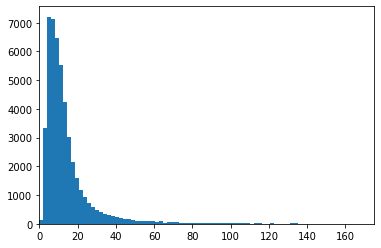

In [38]:
plt.hist(df['unit_offset'], bins=500)
plt.xlim(0,175)

In [56]:
df.dropna(inplace=True)

In [58]:
run1_cols = [ 'unit_offset', 'lat_avg',
              'lng_avg', 'number_of_panels_median']
run1 = df[run1_cols].copy()

In [59]:
run1.head()

,unit_offset,lat_avg,lng_avg,number_of_panels_median
0,3.685815,34.267040,-118.432716,29.0
1,30.873486,43.156368,-77.607040,112.0
2,8.759246,42.277794,-89.066589,21.0
3,7.497531,40.422962,-79.993729,13.0
4,7.390416,33.844044,-117.933113,46.0


In [60]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(run1, random_state=13, train_size=.8, test_size=.2)
train.shape, test.shape

((38931, 4), (9733, 4))

In [61]:
#split into X matrices and y vectors
target = 'unit_offset'
features = run1.columns.drop(target)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [62]:
from sklearn.metrics import mean_absolute_error

In [67]:
#create a baseline
baseline = y_train.mean()
y_pred = [baseline] * len(X_test)
mea = mean_absolute_error(y_test, y_pred)
print(f'The mean baseline is: {baseline}', '\n', f'This gives us a mea of {mea}')

The mean baseline is: 15.292462562196453 
 This gives us a mea of 10.08793041926716
